In [1]:
import numpy as np
import pandas as pd
from IPython.display import Markdown
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
species = pd.Series(['Human', 'Olive baboon', 'House mouse', 'Domestic dog', 'Bovine, Hereford cattle', 'Gray short-tailed opossum'])
latin = pd.Series(['Homo sapiens', 'Papio anubis', 'Mus musculus', 'Canis lupus familiaris', 'Bos taurus', 'Monodelphis domestica'])
class_tax = pd.Series(['Mammalia']*6)
clade = pd.Series(['Boreoeutheria', 'Boreoeutheria', 'Boreoeutheria', 'Boreoeutheria', 'Boreoeutheria', 'Ameridelphia'])
order = pd.Series(['Primates', 'Primates', 'Rodentia', 'Carnivora', 'Artiodactyla', 'Didelphimorphia'])
subdivision = pd.Series(['Euarchontoglires', 'Euarchontoglires', 'Euarchontoglires', 'Laurasiatheria', 'Laurasiatheria', 'Phalangeriformes'])

table_taxonomy = pd.DataFrame({'species':species,
                               'latin':latin,
                               'taxonomy_class':class_tax,
                               'clade':clade,
                               'order':order,
                               'sub class':subdivision}).set_index(['taxonomy_class', 'clade', 'sub class', 'order', 'species'])

display(table_taxonomy)

latin
taxonomy_class clade         sub class        order           species                                          
Mammalia       Boreoeutheria Euarchontoglires Primates        Human                                Homo sapiens
                                                              Olive baboon                         Papio anubis
                                              Rodentia        House mouse                          Mus musculus
                             Laurasiatheria   Carnivora       Domestic dog               Canis lupus familiaris
                                              Artiodactyla    Bovine, Hereford cattle                Bos taurus
               Ameridelphia  Phalangeriformes Didelphimorphia Gray short-tailed opossum   Monodelphis domestica

In [7]:
import plotly.express as px
import networkx as nx
! apt install libgraphviz-dev
! pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgraphviz-dev is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 4.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.14-cp311-cp311-linux_x86_64.whl size=169716 sha256=0f1f61b127fd6cf7bee1a03ae37dc40ef61eef0e4696148a1568045743ba0286
  Stored in directory: /root/.cache/pip/wheels/9c/5f/df/6fffd2a4353f26dbb0e3672a1baf070c124a1d74a5f9318279
Successfully built pygraphviz


{'Mammalia': Text(346.05, 306.0, 'Mammalia'),
 'Boreoeutheria': Text(285.05, 234.0, 'Boreoeutheria'),
 'Euarchontoglires': Text(210.05, 162.0, 'Euarchontoglires'),
 'Primates': Text(94.047, 90.0, 'Primates'),
 'Human': Text(37.047, 18.0, 'Human'),
 'Olive baboon': Text(151.05, 18.0, 'Olive baboon'),
 'House mouse': Text(213.05, 90.0, 'House mouse'),
 'Laurasiatheria': Text(360.05, 162.0, 'Laurasiatheria'),
 'Domestic dog': Text(357.05, 90.0, 'Domestic dog'),
 'Hereford cattle': Text(499.05, 90.0, 'Hereford cattle'),
 'Opossum': Text(408.05, 234.0, 'Opossum')}

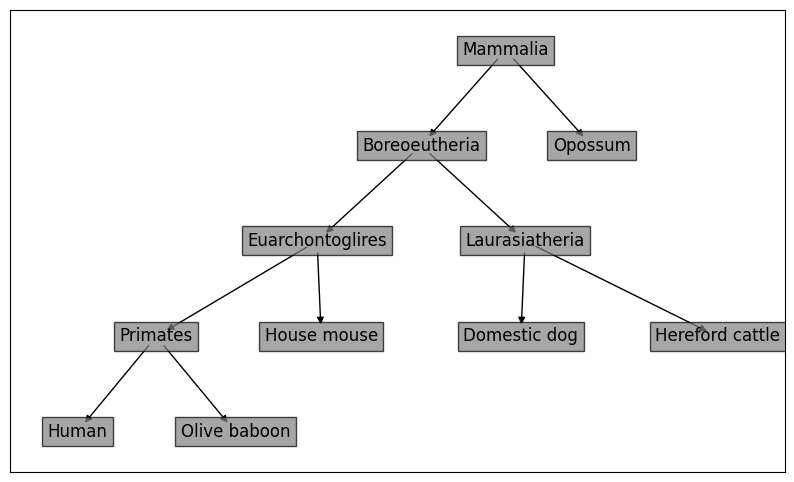

In [12]:
G = nx.DiGraph()
table = table_taxonomy.drop('latin', axis = 1)
for (taxonomy_class, clade, sub_class, order, species) in table.index:
  if species == 'Gray short-tailed opossum':
    species = 'Opossum'
  if species == 'Bovine, Hereford cattle':
    species = 'Hereford cattle'
  G.add_edge(taxonomy_class, clade, shape='square')
  G.add_edge(clade, sub_class)
  G.add_edge(sub_class, order)
  G.add_edge(order, species)
G.add_edge('Laurasiatheria', 'Domestic dog')
G.add_edge('Laurasiatheria', 'Hereford cattle')
G.add_edge('Euarchontoglires', 'House mouse')
G.add_edge('Mammalia', 'Opossum')
node_list = list(G.nodes())
for node in node_list:
  if node in ['Rodentia', 'Artiodactyla', 'Didelphimorphia', 'Carnivora', 'Phalangeriformes', 'Ameridelphia']:
    G.remove_node(node)
(figure, axes) = plt.subplots(figsize=(10, 6))
coordinates = nx.nx_agraph.graphviz_layout(G, prog="dot")
label_options = {"ec": "black", "fc": 'gray', "alpha": 0.7}
nx.draw_networkx_edges(G, coordinates, ax=axes)
nx.draw_networkx_labels(G, coordinates, font_size=12, bbox=label_options, ax=axes)